# Loss of significance

**Worth studying resources:**
* [Wikipedia](https://www.wikiwand.com/en/Loss_of_significance)

In [1]:
using Plots

# Example 1.
Cosider the function $$f(x) = \frac{1-\cos(x)}{x^2}$$


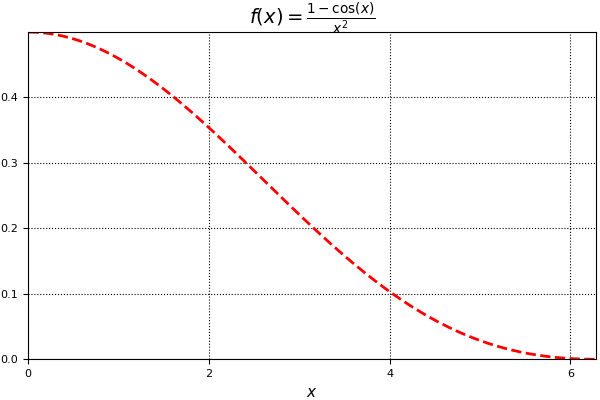

In [2]:
pyplot()
f(x) = ( 1.0 - cos.(x) ) ./ x.^2

x = linspace(0, 2*pi, 1000);
plot(x, f(x), color="red", linewidth=2.0, linestyle=:dash, 
    title="\$f(x)=\\frac{1-\\cos(x)}{x^2}\$", legend=false, xlabel="\$x\$")

One can easily check that
$$\lim_{x\to 0} f(x) = \frac12.$$
However, we have the **problem**

In [3]:
x_testing = [ 0.1, 0.01, 0.001, 0.0001,  0.000000015, 0.000000013, 0.000000011 ]
for x in x_testing; @printf("f(%.10f) = %.6f\n", x, f(x)); end

f(0.1000000000) = 0.499583
f(0.0100000000) = 0.499996
f(0.0010000000) = 0.500000
f(0.0001000000) = 0.500000
f(0.0000000150) = 0.493432
f(0.0000000130) = 0.656937
f(0.0000000110) = 0.917540


The most crazy result is **<tt>f(0.000000011) = 0.917540</tt>** which is very far from **<tt>0.5</tt>**.

The reason is the **cancellation of digits (loss of significance)** caused by subtraction of almost the same numbers (in the numerator, i.e. $1-\cos(x)$).

### Solution
The solution is to use *better* formula for $f(x)$ (without subtraction):
$$f(x) = \frac{2\sin^2(x/2)}{x^2}$$

In [4]:
# f(x) = ( 1.0 - cos(x) ) ./ x.^2
g(x) = 2.0*sin(x/2.0)^2/x^2
for x in x_testing; @printf("g(%.10f) = %.6f\n", x, g(x)); end

g(0.1000000000) = 0.499583
g(0.0100000000) = 0.499996
g(0.0010000000) = 0.500000
g(0.0001000000) = 0.500000
g(0.0000000150) = 0.500000
g(0.0000000130) = 0.500000
g(0.0000000110) = 0.500000


# Example 2 (similar problem, but with sinus)
Consider the function $$f(x) = x-\sin(x).$$
Of course $f(x)>0$ for any $x\in\mathbb R$.

But for very small number $x$ our computer gives <tt>f(x)=0.0</tt> (see the code below).

In [5]:
x_testing = [ 100.0 20.0 10.0 7.0 5.0 3.0 2.0 1.0 ]*1e-8

f(x) = x-sin(x)
for x in x_testing; @printf("f(%.2e) = %.3e\n", x, f(x)); end

f(1.00e-06) = 1.667e-19
f(2.00e-07) = 1.323e-21
f(1.00e-07) = 1.721e-22
f(7.00e-08) = 5.294e-23
f(5.00e-08) = 1.985e-23
f(3.00e-08) = 6.617e-24
f(2.00e-08) = 0.000e+00
f(1.00e-08) = 0.000e+00


Let us remark the following exact values:
<pre>f(1.00e-06) = 1.667e-19
f(2.00e-07) = 1.333e-21
f(1.00e-07) = 1.667e-22
f(7.00e-08) = 5.717e-23
f(5.00e-08) = 2.083e-23
f(3.00e-08) = 4.500e-24
f(2.00e-08) = 1.333e-24
f(1.00e-08) = 1.667e-25</pre>
 
Thus in the case of ast two values, our computer have lost all the information. This can make a problem, especially if $f(x)$ appears in some denominator somewhere.

### Solution
A possible solution to this problem is to use Taylor's series for sinus (at $x=0$):
$$ \sin(x) = x - x^3/3! + x^5/5! - x^7/7! + \ldots $$
On ecan check that truncating that series after few terms yields very good results.

In [6]:
g(x) = x^3/factorial(3) - x^5/factorial(5) + x^7/factorial(7)
for x = [ 100.0 20.0 10.0 7.0 5.0 3.0 2.0 1.0 ]*1e-8
  y = g(x);
  @printf("g(%.2e) = %.3e\n", x, y);
end

g(1.00e-06) = 1.667e-19
g(2.00e-07) = 1.333e-21
g(1.00e-07) = 1.667e-22
g(7.00e-08) = 5.717e-23
g(5.00e-08) = 2.083e-23
g(3.00e-08) = 4.500e-24
g(2.00e-08) = 1.333e-24
g(1.00e-08) = 1.667e-25


# Example 3 (roots of quadratic equation)
Consider the simple quadratic equation
$$ ax^2+bx+c = 0. $$
The naive algorithm gives the following values.

In [7]:
a = 1.0
b = 9999999.0
c = 1.0e4

f(x) = a*x^2+b*x+c

Δ=b^2-4.0*a*c

@show x1 = (-b - sqrt(Δ)) / (2.0*a)
@show x2 = (-b + sqrt(Δ)) / (2.0*a)

@show f(x1)
@show f(x2)

x1 = (-b - sqrt(Δ)) / (2.0a) = -9.999998999e6
x2 = (-b + sqrt(Δ)) / (2.0a) = -0.0010000001639127731
f(x1) = 0.0
f(x2) = -0.0006381275670719333


-0.0006381275670719333

We see that <tt>f(x2)</tt> **is not zero**. It is not evel *small* number.

### Solution
But if we use Viete's formula we obtain as follows

In [8]:
x2_prime = c/(a*x1)
@show f(x2_prime)

@printf("x2       = %.16f\n", x2);
@printf("x2_prime = %.16f\n", x2_prime);

f(x2_prime) = 0.0
x2       = -0.0010000001639128
x2_prime = -0.0010000001001000


# Example 4 (cummulative error)
Now consider the summation of the series
$$ \sum_{k=1}^{\infty} \frac{1}{k^2} $$

Using very long precision arithmetic we obtained the following values of partial sums
<pre>s_{10^5} = 1.6449240668982262698057485033127
s_{10^6} = 1.6449330668487264363057484999794
s_{10^7} = 1.6449339668482314364722484999793
s_{10^8} = 1.6449340568482264864724149999793
s_{10^9} = 1.6449340658482264369724151664793</pre>

In [9]:
partialSum = Dict( 
    "1e5" => 1.6449240668982262698057485033127,
    "1e6" => 1.6449330668487264363057484999794,
    "1e7" => 1.6449339668482314364722484999793,
    "1e8" => 1.6449340568482264864724149999793,
    "1e9" => 1.6449340658482264369724151664793 );

Consider the computation in **single precision arithmetic** (Float32).

In [4]:
real = Float32

Float32

Let use two simple algorithms. First computes the partial sum by adding the term form the first (largest) to the last.
The second algorithm does it in opposite direction. One can observe that the order of summation **really matters**.

In [11]:
function alg1(n)
  suma = zero(real);
  for k = 1:1:n
    suma = suma + one(real)/convert(real, k)/convert(real,k);
  end
  return suma
end

function alg2(n)
  suma = zero(real);
  for k = n:-1:1
    suma = suma + one(real)/convert(real, k)/convert(real,k);
  end
  return suma
end
alg1, alg2

(alg1, alg2)

In [12]:
for key in [ "1e5", "1e6", "1e7", "1e8" ]
    n = Int64( parse(Float64,key) )
    x = partialSum[key]
    y = alg1(n)    
    @printf("Algorithm 1: (largest->smallest)   s_{%s} => %.16f   (rel_err = %.3e)\n", key, y, abs(x-y)/x);
    y = alg2(n)    
    @printf("Algorithm 2: (largest<-smallest)   s_{%s} => %.16f   (rel_err = %.3e)\n", key, y, abs(x-y)/x);
    @printf("Exact value                                => %.16f\n", x);
    println("-----")
end

Algorithm 1: (largest->smallest)   s_{1e5} => 1.6447253227233887   (rel_err = 1.208e-04)
Algorithm 2: (largest<-smallest)   s_{1e5} => 1.6449240446090698   (rel_err = 1.355e-08)
Exact value                                => 1.6449240668982263
-----
Algorithm 1: (largest->smallest)   s_{1e6} => 1.6447253227233887   (rel_err = 1.263e-04)
Algorithm 2: (largest<-smallest)   s_{1e6} => 1.6449329853057861   (rel_err = 4.957e-08)
Exact value                                => 1.6449330668487265
-----
Algorithm 1: (largest->smallest)   s_{1e7} => 1.6447253227233887   (rel_err = 1.268e-04)
Algorithm 2: (largest<-smallest)   s_{1e7} => 1.6449339389801025   (rel_err = 1.694e-08)
Exact value                                => 1.6449339668482315
-----
Algorithm 1: (largest->smallest)   s_{1e8} => 1.6447253227233887   (rel_err = 1.269e-04)
Algorithm 2: (largest<-smallest)   s_{1e8} => 1.6449340581893921   (rel_err = 8.153e-10)
Exact value                                => 1.6449340568482265
-----


It is woth to remind the arihtmetic precision for Float32

In [5]:
@printf("Arithmetic precision = %.3e\n", 0.5*eps(real));

Arithmetic precision = 5.960e-08


So the first algorithm losts almost half of that precision :-(

Second algorithm does not, and is stable, as well.